In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
sys.path.pop(1)
sys.path.insert(0,'../')

In [3]:
import pyathena as pa

In [5]:
coolftn=pa.coolftn()

# Cooling function

* For original data in the code units, $P/\rho=c_s^2$. We define $T_1=m_H c_s^2/k_B$ is the temperature as if $\mu=1$.
* We tabulated $T$, $\Lambda(T)$, $\Gamma(T)$ as a function of $T_1$ using $\mu(T) = T/T_1$ and stored them to `coolftn.p`
* `class coolftn` loads the information from `coolftn.p` and provides methods to conversion from $T_1$ to $T$, $\Lambda$, and $\Gamma$

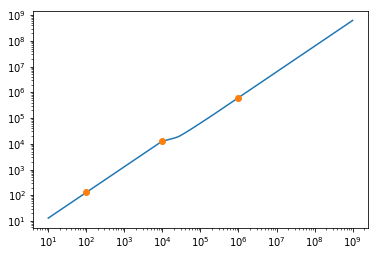

In [6]:
plt.loglog(coolftn.T1,coolftn.temp)
cs2=np.array([1.e2,1.e4,1.e6])
plt.loglog(cs2,coolftn.get_temp(cs2),'o')

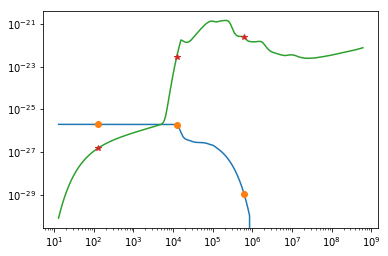

In [7]:
plt.loglog(coolftn.temp,coolftn.heat)
plt.loglog(coolftn.get_temp(cs2),coolftn.get_heat(cs2),'o')
plt.loglog(coolftn.temp,coolftn.cool)
plt.loglog(coolftn.get_temp(cs2),coolftn.get_cool(cs2),'*')


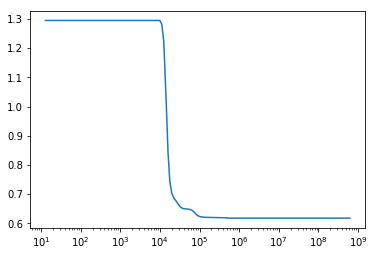

In [8]:
mu=coolftn.temp/coolftn.T1
plt.semilogx(coolftn.temp,mu)

(1e-29, 1e-25)

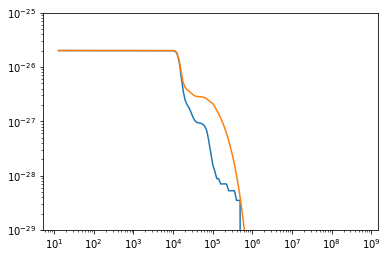

In [9]:
plt.loglog(coolftn.temp,(mu-mu.min())/(mu.max()-mu.min())*coolftn.heat[0])
plt.loglog(coolftn.temp,coolftn.heat)
plt.ylim(1.e-29,1.e-25)

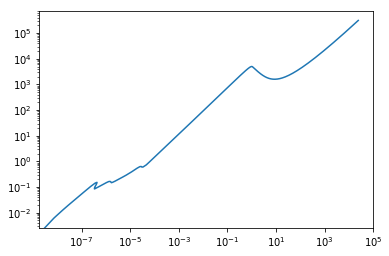

In [10]:
nden=coolftn.heat/coolftn.cool
plt.loglog(nden,coolftn.temp*nden)

In [22]:
@np.vectorize
def SarazinWhite(T):
    c1=[4.7,0.313,6.42,0.00439]
    T0=[3.5e5,3e6,2.1e6,0]
    a1=[0,0.08,-0.2,0.35]
    a2=[4.5,4.4,4.0]
    
    l1=4.7*np.exp(-(T/3.5e5)**4.5)
    l2=0.313*T**0.08*np.exp(-(T/3.e6)**4.4)
    l3=6.42*T**(-0.2)*np.exp(-(T/2.1e6)**4.0)
    l4=0.00439*T**0.35
    return (l1+l2+l3+l4)*1.e-22

(1e-30, 1e-20)

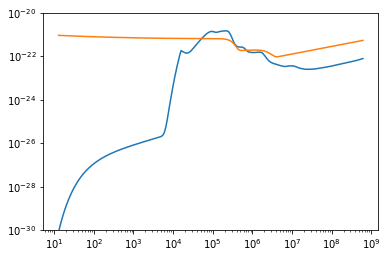

In [24]:
plt.loglog(coolftn.temp,coolftn.cool)
plt.loglog(coolftn.temp,SarazinWhite(coolftn.temp))
#plt.plot(coolftn.temp,1.e-22*0.00439*coolftn.temp**0.35)
plt.ylim(1.e-30,1.e-20)